In [7]:
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.measure import regionprops
from skimage.util import img_as_float
from skimage import io
from skimage import color
from PIL import Image, ImageFilter
from skimage import measure
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import random

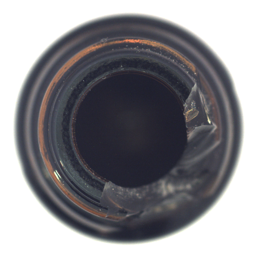

In [8]:
imsize=(256,256)
image = Image.open('../dataset/bottle/test/broken_large/000.png').resize(imsize).convert('RGB')
image

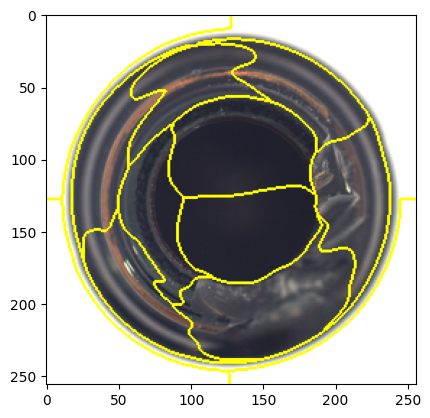

In [6]:
image_array = np.array(image)
segments = slic(image_array, n_segments = 100, sigma = 5, convert2lab=True)
image_array_marked = mark_boundaries(image_array, segments)
plt.imshow(image_array_marked)

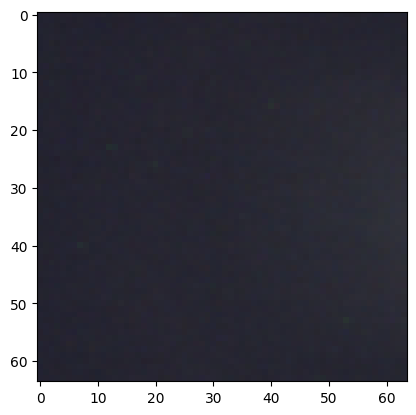

In [113]:
region = regionprops(segments)
i = random.randint(0, len(region)-1)
# (left,top,right,bottom) della regione del superpixel
top, left, bottom, right = region[i].bbox
# ricavo i lati
width = right-left
height = bottom-top
# valore medio di entrambi (voglio un quadrato)
patch_side = int((width+height)/2)
#centro
center = region[i].centroid
# left, top
left = center[0] - int(patch_side/2)
top = center[0] - int(patch_side/2)
if left < 0:
    left = 0
if top < 0:
    top = 0
#right, bottom
right = left + patch_side
bottom = top + patch_side
if right > image.size[0]:
    right = image.size[0]
if bottom > image.size[1]:
    bottom = image.size[1]
cropped = image.crop((left,top,right,bottom))
cropped = cropped.resize((64,64))
plt.imshow(cropped)

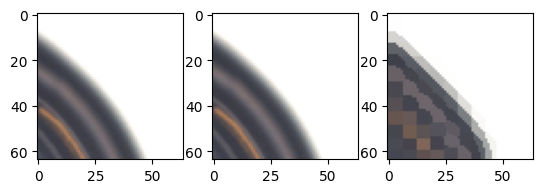

In [9]:
cropped = transforms.RandomCrop(64)(image)
image_array = np.array(cropped)
segments = slic(image_array, n_segments = 100, sigma = 7, convert2lab=True)
superpixels = color.label2rgb(segments, image_array, kind='avg')
superpixels_pil = Image.fromarray(superpixels).convert('RGB')

fig, axs = plt.subplots(1,3)
axs[0].imshow(image_array)
axs[1].imshow(cropped)
axs[2].imshow(superpixels_pil)


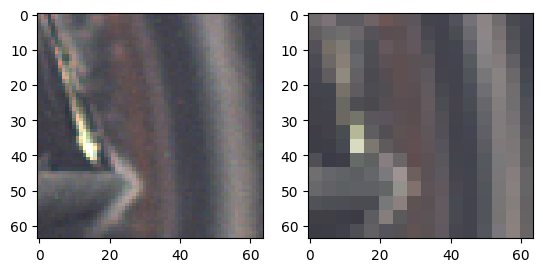

In [67]:
import torch
cropped = transforms.RandomCrop(64)(image)
image_array = np.array(cropped)
segments = slic(image_array, n_segments = 300, sigma = 5, convert2lab=True)
superpixels = color.label2rgb(segments, image_array, kind='avg')
fig, axs = plt.subplots(1,2)
axs[0].imshow(cropped)
axs[1].imshow(superpixels)

